<a href="https://colab.research.google.com/github/hemander1433/HAND-WRITTEN-DIGITS-RECOGNITION/blob/main/Pytorch_project_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HANDWRITTEN DIGITS RECOGNITION USING CNN

Epoch [1/5], Loss: 0.1894
Epoch [2/5], Loss: 0.0504
Epoch [3/5], Loss: 0.0360
Epoch [4/5], Loss: 0.0273
Epoch [5/5], Loss: 0.0216
Accuracy on test data: 98.68%


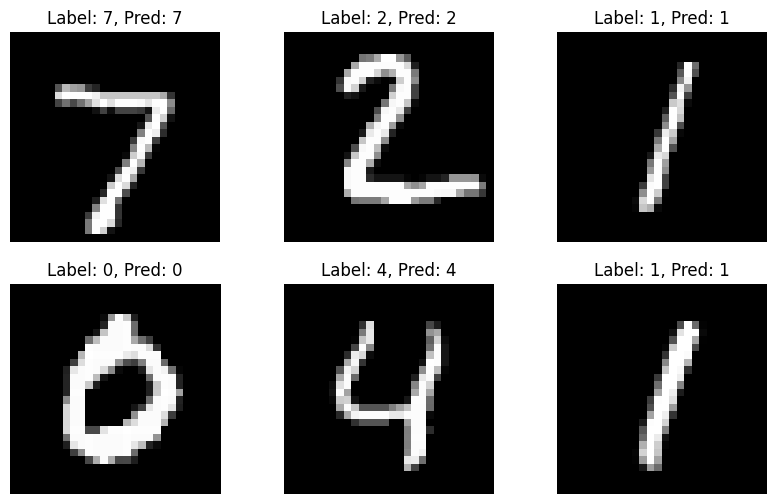

In [ ]:
#                     HANDWRITTEN DIGITS RECOGNITION USING CNN



# Import required libraries first
import torch
import torch.nn as nn
import torch.optim as optim            #for optimiser
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt               # for graphs

# Step 1: Load and Preprocess the Dataset
# Define transformations: convert to tensor and normalize
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize pixel values to [-1, 1]
])

# Download and load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# DataLoaders for batching and shuffling
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Step 2: Define the CNN Model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)  # First conv layer
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)  # Second conv layer
        self.fc1 = nn.Linear(32 * 7 * 7, 128)  # Fully connected layer 1
        self.fc2 = nn.Linear(128, 10)  # Fully connected layer 2 (output)

    def forward(self, x):
        x = torch.relu(self.conv1(x))  # Apply ReLU activation   RELU is an activation function mainly used to introduce non linearity in the nn.
        x = torch.max_pool2d(x, 2)  # Max pooling (reduce size by half)
        x = torch.relu(self.conv2(x))  # Apply ReLU activation
        x = torch.max_pool2d(x, 2)  # Max pooling
        x = x.view(x.size(0), -1)  # Flatten for the fully connected layer
        x = torch.relu(self.fc1(x))  # Fully connected layer + ReLU
        x = self.fc2(x)  # Final output layer
        return x

# call the model
model = CNN()

# Step 3: Define Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# Step 4: Train the Model
epochs = 5
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()  # Clear gradients
        outputs = model(images)  # Forward pass step 1
        loss = criterion(outputs, labels)  # Compute loss ste 2
        loss.backward()  # Backward pass step 3
        optimizer.step()  # Update weights step 4
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")

# Step 5: Test the Model
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():  # Disable gradient computation for testing
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Get predicted class
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Accuracy on test data: {accuracy:.2f}%")

# Step 6: Visualize Results

data_iter = iter(test_loader)  # Create an iterator from the DataLoader
images, labels = next(data_iter)  # Use the next() function to get one batch of data

# Pass the batch through the model to get predictions
with torch.no_grad():  # Disable gradient calculation for efficiency
    outputs = model(images)
_, predicted = torch.max(outputs, 1)  # Get the predicted class indices

# Plot some test images with predicted labels
plt.figure(figsize=(10, 6))
for i in range(6):  # Display the first 6 images in the batch
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i][0], cmap='gray')  # MNIST images are single-channel (grayscale)
    plt.title(f"Label: {labels[i].item()}, Pred: {predicted[i].item()}")  # Convert tensor to int
    plt.axis('off')  # Turn off axis for better visualization
plt.show()
